# Customer Segmentation on Online Retail Data Using RFM Analysis 
## Reynara Ezra Pratama

## Background

Data retail online II berisi seluruh data transaksi retail non-toko yang berbasis di Inggris dan terdaftar yang terjadi pada tanggal 1 Desember 2009 s/d 9 Desember 2011. Perusahaan ini terutama menjual perlengkapan hadiah unik dan banyak pelanggan perusahaan adalah grosir. 

Dataset yang akan digunakan dalam melakukan *customer segmentation* dapat dilihat pada [link ini](https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository)

## Business Understanding

1. Mendapatkan gambaran bisnis produk yang terjual pada tahun 2009-2010 dan 2010-2011.
2. Melakukan segmentasi pada *Customer* untuk melihat karakteristiknya.
3. Mengetahui rekomendasi yang dapat dilakukan setelah diketahui karakteristik *Customer*.

## Data Understanding

1. `Invoice` : Nomer invoice. 6 digit angka unik untuk setiap transaksi. Jika data diawali 'c', menandakan pembatalan.
2. `StockCode` : Kode produk. 5 digit angka unik untuk setiap produk.
3. `Description` : Penjelasan nama dari produk.
4. `Quantity` : Jumlah produk setiap transaksi.
5. `InvoiceDate` : Tanggal dan waktu dari Invoice.
6. `Price` : Harga unit.
7. `Customer ID` : Nomer *customer*. 5 digit angka untuk untuk setiap *customer*.
8. `Country` : Negara dimana *customer* berada.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Loading Dataset

### Load Data From Github

In [2]:
# data_2009_2010 = pd.read_csv('https://raw.githubusercontent.com/ReynaraEzra/Customer-Segmentation/main/data_input/Year%202009-2010.csv')
# data_2010_2011 = pd.read_csv('https://raw.githubusercontent.com/ReynaraEzra/Customer-Segmentation/main/data_input/Year%202010-2011.csv')

### Load Data From Local File

In [3]:
data_2009_2010 = pd.read_csv('data_input\Year 2009-2010.csv', encoding='unicode_escape')
data_2010_2011 = pd.read_csv('data_input\Year 2010-2011.csv', encoding='unicode_escape')

## Checking Dataset

### Data 2009 - 2010

In [4]:
data_2009_2010.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [5]:
data_2009_2010.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,12/9/2010 20:01,1.95,17530.0,United Kingdom


In [6]:
data_2009_2010.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
270327,515591,21121,SET/10 RED SPOTTY PARTY CANDLES,1,7/13/2010 13:20,1.25,13428.0,United Kingdom
79734,496631,22215,CAKE STAND WHITE TWO TIER LACE,2,2/3/2010 10:39,8.50,14146.0,United Kingdom
307050,519358,90104,PURPLE FRANGIPANI HAIRCLIP,1,8/16/2010 12:36,0.83,NaN,United Kingdom
470801,533750,21865,PINK UNION JACK PASSPORT COVER,2,11/18/2010 14:17,2.10,15571.0,United Kingdom
413648,528919,22200,FRYING PAN PINK POLKADOT,1,10/25/2010 14:27,4.25,16259.0,United Kingdom


### Data 2010 - 2011

In [7]:
data_2010_2011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
data_2010_2011.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France


In [9]:
data_2010_2011.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
171278,551400,22149,FELTCRAFT 6 FLOWER FRIENDS,12,4/28/2011 13:18,2.10,17160.0,United Kingdom
393002,570791,23065,LARGE DECO JEWELLERY STAND,1,10/12/2011 11:58,12.50,17346.0,United Kingdom
23271,538195,48184,DOORMAT ENGLISH ROSE,30,12/10/2010 10:52,6.75,15061.0,United Kingdom
480775,577317,22866,HAND WARMER SCOTTY DOG DESIGN,1,11/18/2011 13:33,2.10,16426.0,United Kingdom
460638,575923,23545,WRAP RED VINTAGE DOILY,25,11/11/2011 17:11,0.42,17069.0,United Kingdom


## Customer Segmentation on Data Des 2009 - Nov 2010

In [10]:
df1 = data_2009_2010.copy()

### Check Characteristic Data

**Data Shape**

Kita akan mengecek ukuran dari data tahun 2009-2010 menggunakan atribut `.shape`

In [11]:
df1.shape

(525461, 8)

Terlihat data transaksi pada tahun 2009-2010 sejumlah 525461 baris dengan 8 buah kolom.

**Data Columns**

In [12]:
df1.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

**Data Info**

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


Terdapat data yang kosong pada kolom tertentu saat dicek menggunakan metode `.info()`. Untuk data yang kita punya, diperoleh 2 kolom dengan tipe data *float*, 1 kolom dengan tipe data *integer*, dan 5 kolom dengan tipe data *object*.

**Descriptive Statistic**

In [14]:
df1.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


Saat kita melihat statistika deskriptif dari data tahun 2009-2010, diperoleh beberapa *insight* seperti :
1. Nilai maksimum untuk kolom `Quantity` adalah 19152, sementara nilai kuartil atasnya (Q3) adalah 10. Hal ini mengindikasikan terdapat suatu transaksi dengan total pembelian barang yang sangat banyak untuk satu kali transaksi.
2. Nilai maksimum untuk kolom `Price` adalah 25111,09, sementara nilai kuartil atasnya (Q3) adalah 4,21. Hal ini mengindikasikan terdapat suatu transaksi dengan total harga yang sangat banyak untuk satu kali transaksi.
3. Terdapat nilai negatif pada kolom `Quantity`. Hal ini dapat dicurigai pembelian yang dibatalkan (Terdapat 'C' pada *Invoice*).
4. Terdapat nilai negatif pada kolom `Price`. Hal ini juga dicurigain pembelian yang dibatalkan (Terdapat 'C' pada *Invoice*).

**Drop Invalid Data On Invoice**

Sebelumnya kita telah mengetahui bahwa huruf `'C'` pada kolom `Invoice` menandakan transaksi yang dibatalkan. Oleh karenanya, kita akan membuang data yang mempunyai huruf `'C'` pada kolom `Invoice`.

In [15]:
df1[df1['Invoice'].str.contains('C')].shape

(10206, 8)

Terlihat terdapat 10206 data yang menyatakan transaksi yang dibatalkan. 

In [16]:
df1 = df1[~df1['Invoice'].str.contains('C')]

In [17]:
df1.shape

(515255, 8)

Jumlah data setelah dibuang data transaksi yang dibatalkan adalah 515255.

**Check Null Data**

In [18]:
df1.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107560
Country             0
dtype: int64

Dikarenakan kita tidak bisa menganalisis *customer* jika kolom `CustomerID` bernilai kosong, kita akan membuang data yang mempunyai nilai yang kosong.

In [19]:
df1 = df1.dropna()

In [20]:
df1.shape

(407695, 8)

Terlihat jumlah data setelah membuang data kosong sebanyak 407695.

**Check Duplicate Data**

Kita akan membuang data duplikat pada data.

In [21]:
df1 = df1.drop_duplicates(keep='first')

In [22]:
df1.shape

(400947, 8)

Terlihat jumlah data setelah membuang data duplikat adalah sebanyak 400947.

**Check Describe Again**

In [23]:
df1.describe()

,Quantity,Price,Customer ID
count,400947.000000,400947.000000,400947.000000
mean,13.768523,3.305571,15361.454639
std,97.639816,35.046376,1680.669487
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13985.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16805.000000
max,19152.000000,10953.500000,18287.000000


Terlihat untuk kolom `Price`, masih terdapat data yang bernilai 0. Kita akan membuang data tersebut.

In [24]:
df1 = df1[df1['Price']>0]

**Drop Des 2010 Data**

Kita akan membuang data pada bulan Desember 2010 agar kita mempunyai data untuk 1 tahun dimulai dari Desember 2009 hingga November 2008.

In [25]:
df1.shape

(400916, 8)

In [26]:
df1['InvoiceDate'] = df1['InvoiceDate'].astype('datetime64')

In [27]:
df1 = df1[df1['InvoiceDate']<'2010-12-01']

**Check Data Type**

In [28]:
df1.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

**Check Number of Unique**

In [29]:
df1.nunique()

Invoice        18437
StockCode       4009
Description     4432
Quantity         337
InvoiceDate    17303
Price            442
Customer ID     4266
Country           37
dtype: int64

### Handle Outlier

In [30]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Boxplot in Quantity Columns**

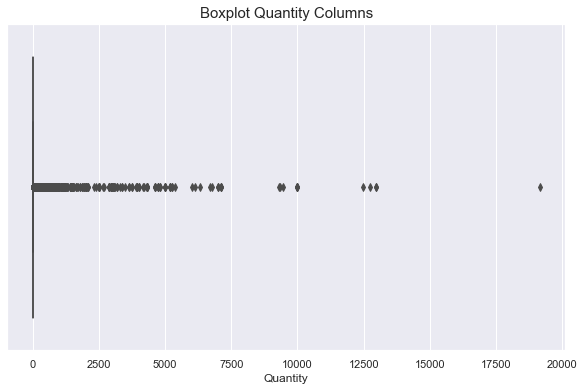

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(df1['Quantity'])
plt.title('Boxplot Quantity Columns', fontsize=15)
plt.show()

Berdasarkan gambar di atas, terlihat untuk kolom `Quantity` mempunyai data outlier.

**Boxplot in Price Columns**

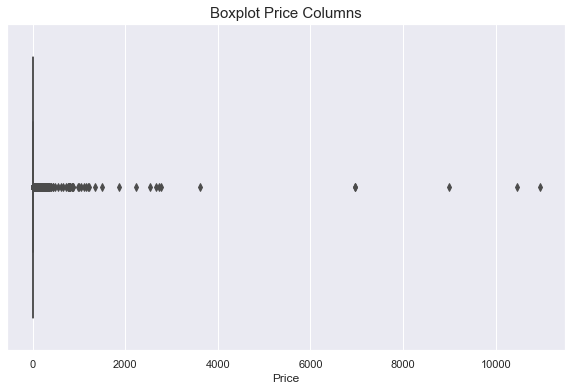

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(df1['Price'])
plt.title('Boxplot Price Columns', fontsize=15)
plt.show()

Berdasarkan gambar di atas, kolom `Price` mempunyai data outlier.

**Remove Outlier Data From Quantity Columns**

In [33]:
q1_quantity = df1['Quantity'].quantile(0.25)
q3_quantity = df1['Quantity'].quantile(0.75)
IQR = q3_quantity - q1_quantity
min_quantity = q1_quantity - 1.5*IQR
max_quantity = q3_quantity + 1.5*IQR
print(f'Q1:{q1_quantity}')
print(f'Q3:{q3_quantity}')
print(f'IQR:{IQR}')
print(f'Min Quantity:{min_quantity}')
print(f'Max Quantity:{max_quantity}')

Q1:2.0
Q3:12.0
IQR:10.0
Min Quantity:-13.0
Max Quantity:27.0


In [34]:
df1 = df1[(df1['Quantity']<=max_quantity) & (df1['Quantity']>=min_quantity)]

In [35]:
df1.shape

(361229, 8)

**Remove Outlier Data From Price Columns**

In [36]:
q1_price = df1['Price'].quantile(0.25)
q3_price = df1['Price'].quantile(0.75)
IQR = q3_price - q1_price
min_price = q1_price - 1.5*IQR
max_price = q3_price + 1.5*IQR
print(f'Q1:{q1_price}')
print(f'Q3:{q3_price}')
print(f'IQR:{IQR}')
print(f'Min Price:{min_price}')
print(f'Max Price:{max_price}')

Q1:1.25
Q3:3.75
IQR:2.5
Min Price:-2.5
Max Price:7.5


In [37]:
df1 = df1[(df1['Price']<=max_price) & (df1['Price']>=min_price)]

In [38]:
df1.shape

(330139, 8)

## Exploratory Data Analysis (EDA)

### Per Month

In [39]:
def make_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(16,5))
    plt.plot(x, y, linestyle='--', marker='o', color='maroon')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=15)
    plt.show()

**Number of Transaction Per Month**

Buat kolom baru `InvoiceMonth` yang menyatakan bulan dari tiap transaksi pembelian.

In [40]:
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.strftime('%Y-%m')

In [41]:
df1_grp1 = df1.groupby('InvoiceMonth')['Invoice'].count()
df1_grp1

InvoiceMonth
2009-12    26073
2010-01    18546
2010-02    20012
2010-03    27460
2010-04    22593
2010-05    23547
2010-06    25780
2010-07    22685
2010-08    22146
2010-09    29010
2010-10    41666
2010-11    50621
Name: Invoice, dtype: int64

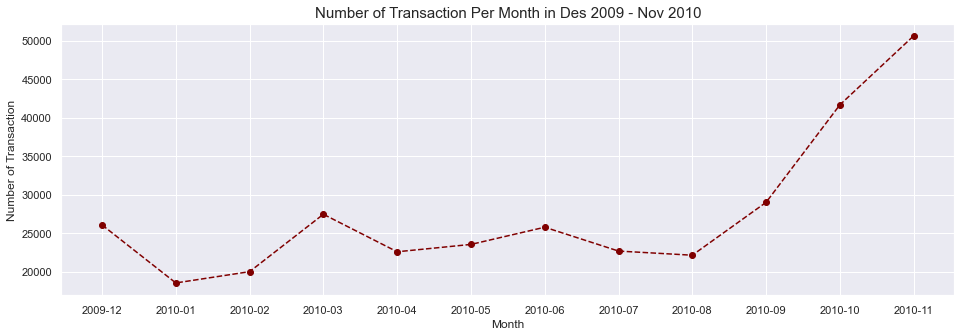

In [42]:
make_line_plot(x=df1_grp1.index, 
               y=df1_grp1, 
               title='Number of Transaction Per Month in Des 2009 - Nov 2010',
               xlabel='Month',
               ylabel='Number of Transaction')

**Total Customer Money Spend Per Month**

Buat kolom baru `Spend` yang menyatakan perkalian antara kolom `Quantity` dan `Price`.

In [43]:
df1['Spend'] = df1['Quantity']*df1['Price']

In [44]:
df1.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,Spend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.0


In [45]:
df1_grp2 = df1.groupby('InvoiceMonth')['Spend'].sum()
df1_grp2

InvoiceMonth
2009-12    365431.430
2010-01    254326.762
2010-02    264033.436
2010-03    356433.261
2010-04    309740.902
2010-05    309253.180
2010-06    319489.440
2010-07    296543.660
2010-08    296085.140
2010-09    405579.911
2010-10    541450.180
2010-11    610665.452
Name: Spend, dtype: float64

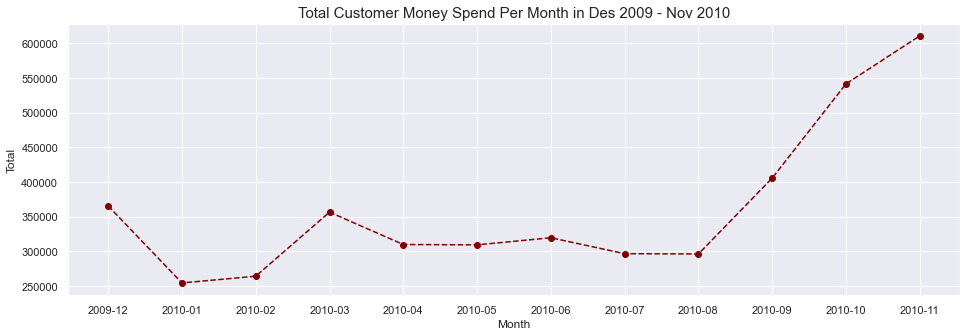

In [46]:
make_line_plot(x=df1_grp2.index, 
               y=df1_grp2, 
               title='Total Customer Money Spend Per Month in Des 2009 - Nov 2010',
               xlabel='Month',
               ylabel='Total')

**Average Customer Money Spend Per Month**

In [47]:
df1_grp3 = df1.groupby('InvoiceMonth')['Spend'].mean()
df1_grp3

InvoiceMonth
2009-12    14.015703
2010-01    13.713295
2010-02    13.193756
2010-03    12.980090
2010-04    13.709596
2010-05    13.133443
2010-06    12.392919
2010-07    13.072235
2010-08    13.369689
2010-09    13.980693
2010-10    12.995012
2010-11    12.063481
Name: Spend, dtype: float64

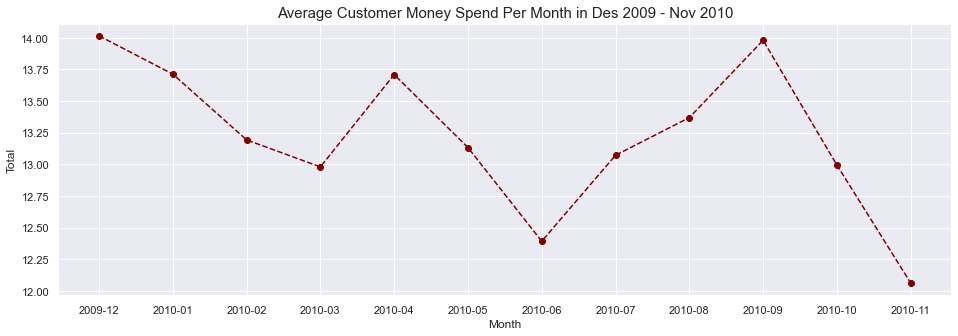

In [48]:
make_line_plot(x=df1_grp3.index, 
               y=df1_grp3, 
               title='Average Customer Money Spend Per Month in Des 2009 - Nov 2010',
               xlabel='Month',
               ylabel='Total')

### Function to Make Barplot

In [49]:
def make_bar_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(16,5))
    sns.barplot(x, y)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=15)
    plt.show()

### Per Day

In [50]:
day_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Buat kolom baru `InvoiceDay` yang menyatakan hari dari tiap transaksi pembelian.

In [51]:
df1['InvoiceDay'] = df1['InvoiceDate'].dt.strftime('%A')

**Number of Transaction Per Day**

In [52]:
df1_grp4 = df1.groupby('InvoiceDay')['Invoice'].count()
df1_grp4

InvoiceDay
Friday       41107
Monday       51865
Saturday       338
Sunday       60967
Thursday     65365
Tuesday      57640
Wednesday    52857
Name: Invoice, dtype: int64

In [53]:
df1_grp4 = df1_grp4.reindex(day_index)

In [54]:
df1_grp4

InvoiceDay
Monday       51865
Tuesday      57640
Wednesday    52857
Thursday     65365
Friday       41107
Saturday       338
Sunday       60967
Name: Invoice, dtype: int64

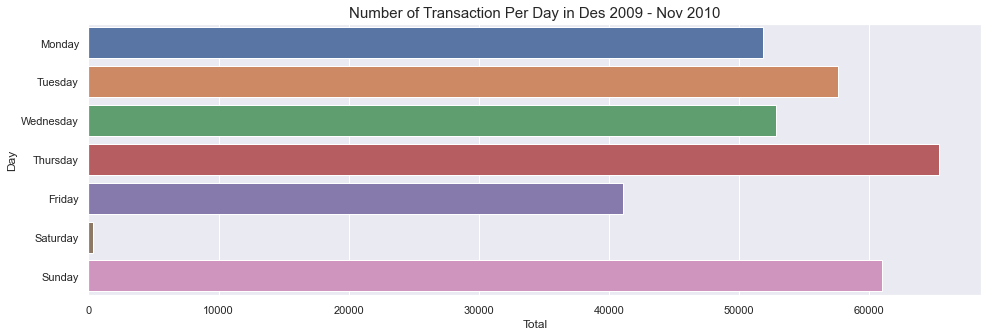

In [55]:
make_bar_plot(y=df1_grp4.index,
              x=df1_grp4,
              title='Number of Transaction Per Day in Des 2009 - Nov 2010',
              ylabel='Day',
              xlabel='Total')

**Total Customer Money Spend Per Day**

In [56]:
df1_grp5 = df1.groupby('InvoiceDay')['Spend'].sum()

In [57]:
df1_grp5 = df1_grp5.reindex(day_index)

In [58]:
df1_grp5

InvoiceDay
Monday       689468.085
Tuesday      808938.731
Wednesday    732053.673
Thursday     883074.762
Friday       586265.172
Saturday       7560.660
Sunday       621671.671
Name: Spend, dtype: float64

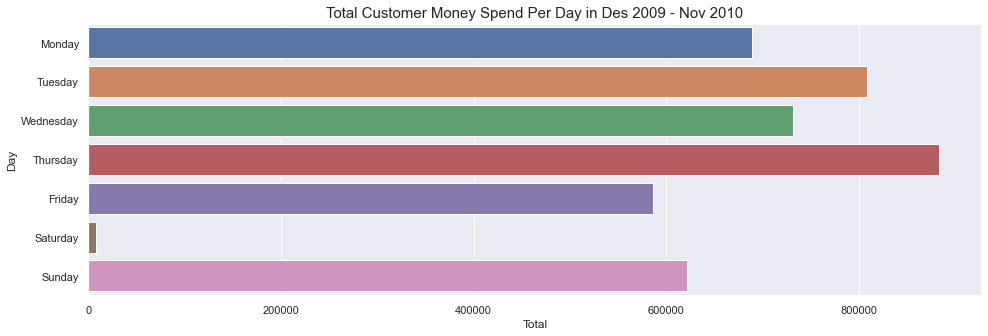

In [59]:
make_bar_plot(y=df1_grp5.index,
              x=df1_grp5,
              title='Total Customer Money Spend Per Day in Des 2009 - Nov 2010',
              ylabel='Day',
              xlabel='Total')

**Average Customer Money Spend Per Day**

In [60]:
df1_grp6 = df1.groupby('InvoiceDay')['Spend'].mean()

In [61]:
df1_grp6 = df1_grp6.reindex(day_index)

In [62]:
df1_grp6

InvoiceDay
Monday       13.293514
Tuesday      14.034329
Wednesday    13.849702
Thursday     13.509902
Friday       14.261930
Saturday     22.368817
Sunday       10.196855
Name: Spend, dtype: float64

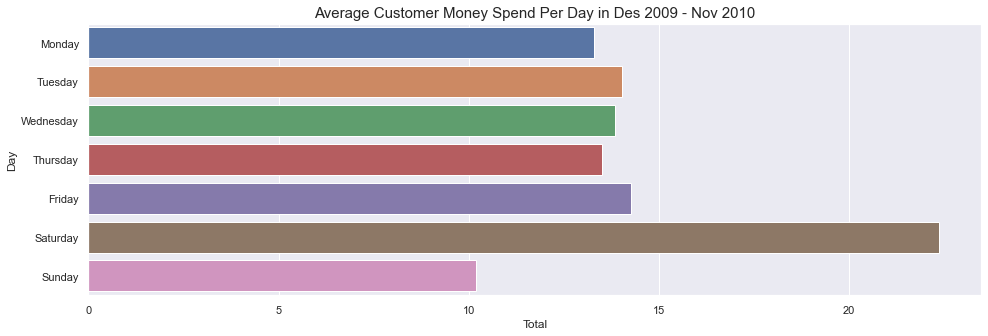

In [63]:
make_bar_plot(y=df1_grp6.index,
              x=df1_grp6,
              title='Average Customer Money Spend Per Day in Des 2009 - Nov 2010',
              ylabel='Day',
              xlabel='Total')

## Per Hour

Buat kolom baru `InvoiceHour` yang menyatakan jam dari setiap transaksi.

In [64]:
df1['InvoiceHour'] = df1['InvoiceDate'].dt.strftime('%H')

**Number of Transaction Per Hour**

In [65]:
df1_grp7 = df1.groupby('InvoiceHour')['Invoice'].count()
df1_grp7

InvoiceHour
07      442
08     5047
09    15379
10    27734
11    41465
12    58845
13    55366
14    46420
15    35591
16    23505
17    11551
18     3673
19     4144
20      977
Name: Invoice, dtype: int64

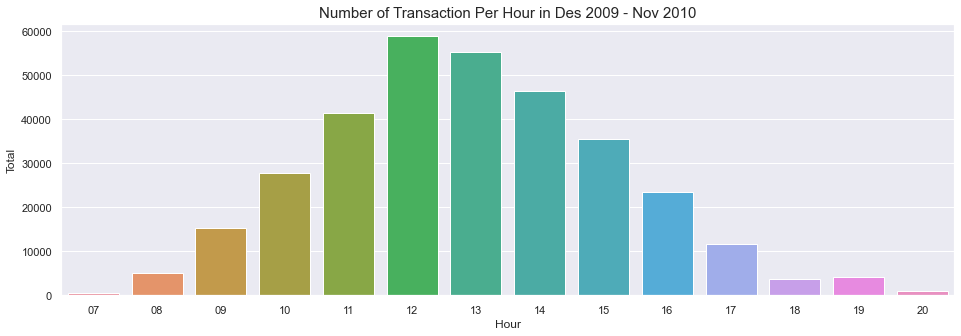

In [66]:
make_bar_plot(x=df1_grp7.index,
              y=df1_grp7,
              title='Number of Transaction Per Hour in Des 2009 - Nov 2010',
              xlabel='Hour',
              ylabel='Total')

**Total Customer Money Spend Per Hour**

In [67]:
df1_grp8 = df1.groupby('InvoiceHour')['Spend'].sum()
df1_grp8

InvoiceHour
07     11422.570
08    107900.230
09    291732.610
10    481531.452
11    524846.033
12    705529.081
13    659721.064
14    580946.500
15    453513.242
16    274137.321
17    136739.871
18     54385.170
19     40457.510
20      6170.100
Name: Spend, dtype: float64

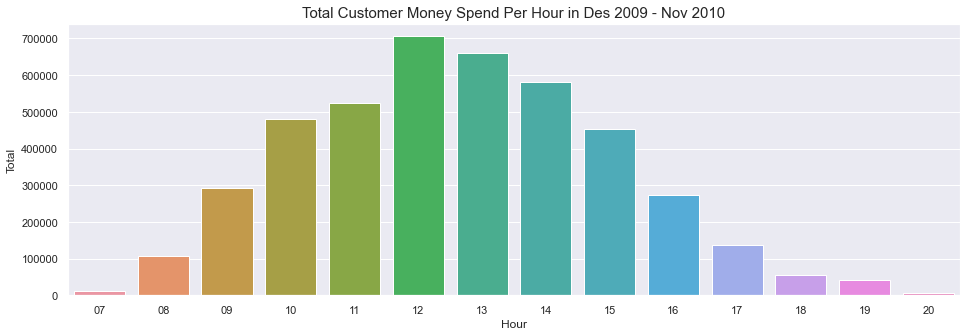

In [68]:
make_bar_plot(x=df1_grp8.index,
              y=df1_grp8,
              title='Total Customer Money Spend Per Hour in Des 2009 - Nov 2010',
              xlabel='Hour',
              ylabel='Total')

**Average Customer Money Spend Per Hour**

In [69]:
df1_grp9 = df1.groupby('InvoiceHour')['Spend'].mean()
df1_grp9

InvoiceHour
07    25.842919
08    21.379083
09    18.969544
10    17.362496
11    12.657567
12    11.989618
13    11.915635
14    12.515004
15    12.742357
16    11.662936
17    11.837925
18    14.806744
19     9.762913
20     6.315353
Name: Spend, dtype: float64

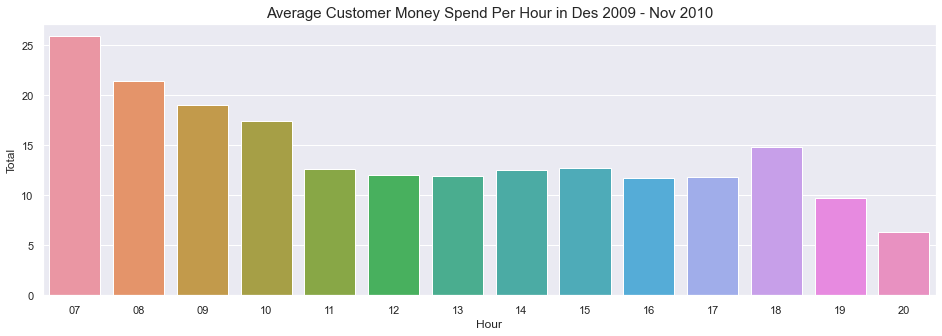

In [70]:
make_bar_plot(x=df1_grp9.index,
              y=df1_grp9,
              title='Average Customer Money Spend Per Hour in Des 2009 - Nov 2010',
              xlabel='Hour',
              ylabel='Total')

### Per Product

In [71]:
df1_grp10 = df1['Description'].value_counts().head(10)
df1_grp10

WHITE HANGING HEART T-LIGHT HOLDER    2369
STRAWBERRY CERAMIC TRINKET BOX        1181
HOME BUILDING BLOCK WORD              1154
REX CASH+CARRY JUMBO SHOPPER          1052
ASSORTED COLOUR BIRD ORNAMENT         1028
60 TEATIME FAIRY CAKE CASES            987
PACK OF 72 RETRO SPOT CAKE CASES       969
LUNCH BAG RED SPOTTY                   959
WOODEN FRAME ANTIQUE WHITE             946
LOVE BUILDING BLOCK WORD               941
Name: Description, dtype: int64

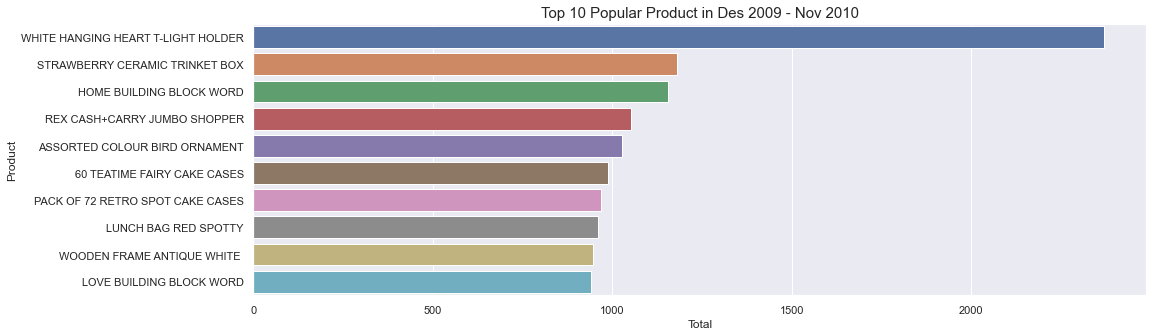

In [72]:
make_bar_plot(y=df1_grp10.index,
              x=df1_grp10,
              title='Top 10 Popular Product in Des 2009 - Nov 2010',
              xlabel='Total',
              ylabel='Product')

### Per Country

In [73]:
df1_grp11 = df1['Country'].value_counts().head(10)
df1_grp11

United Kingdom     302776
EIRE                 6342
Germany              6122
France               4236
Netherlands          1288
Spain                 969
Switzerland           875
Belgium               844
Portugal              726
Channel Islands       594
Name: Country, dtype: int64

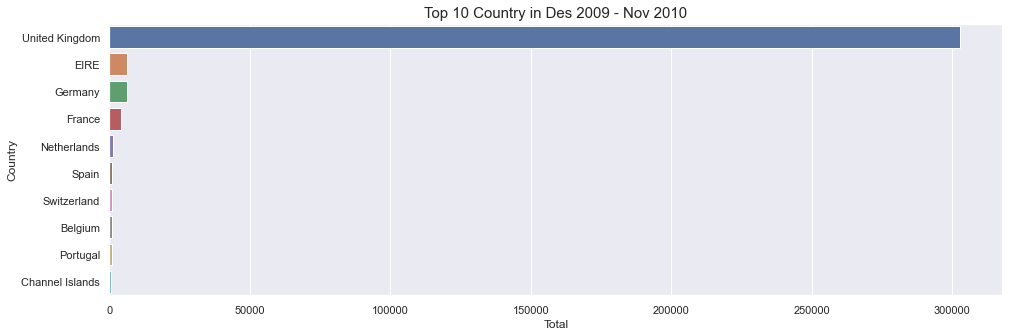

In [74]:
make_bar_plot(y=df1_grp11.index,
              x=df1_grp11,
              title='Top 10 Country in Des 2009 - Nov 2010',
              xlabel='Total',
              ylabel='Country')

## RFM Analysis

In [100]:
def make_displot(data, xlabel):
    plt.figure(figsize=(15,6))
    sns.distplot(data, kde=True, bins=50)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution on {xlabel}', fontsize=15)
    plt.show()

In [86]:
df1_customer_unique = pd.DataFrame(df1['Customer ID'].unique()).rename(columns={0:'Customer ID'}).astype(int)
df1_customer_unique.head()

,Customer ID
0,13085
1,13078
2,15362
3,12682
4,18087


### Recency

In [87]:
df1_recent_trans = df1.groupby('Customer ID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate':'Latest Date'})
df1_recent_trans['Customer ID'] = df1_recent_trans['Customer ID'].astype(int)
df1_recent_trans.head()

,Customer ID,Latest Date
0,12346,2010-06-28 13:53:00
1,12347,2010-10-31 14:20:00
2,12348,2010-09-27 14:59:00
3,12349,2010-10-28 08:23:00
4,12351,2010-11-29 15:23:00


In [88]:
df1_recent_trans['Recency'] = (df1_recent_trans['Latest Date'].max() - df1_recent_trans['Latest Date']).dt.days
df1_recent_trans.head()

,Customer ID,Latest Date,Recency
0,12346,2010-06-28 13:53:00,155
1,12347,2010-10-31 14:20:00,30
2,12348,2010-09-27 14:59:00,64
3,12349,2010-10-28 08:23:00,33
4,12351,2010-11-29 15:23:00,1


In [89]:
df1_recency = pd.merge(left=df1_customer_unique, 
                       right=df1_recent_trans[['Customer ID', 'Recency']],
                       on='Customer ID')
df1_recency.head()

,Customer ID,Recency
0,13085,305
1,13078,0
2,15362,74
3,12682,11
4,18087,5


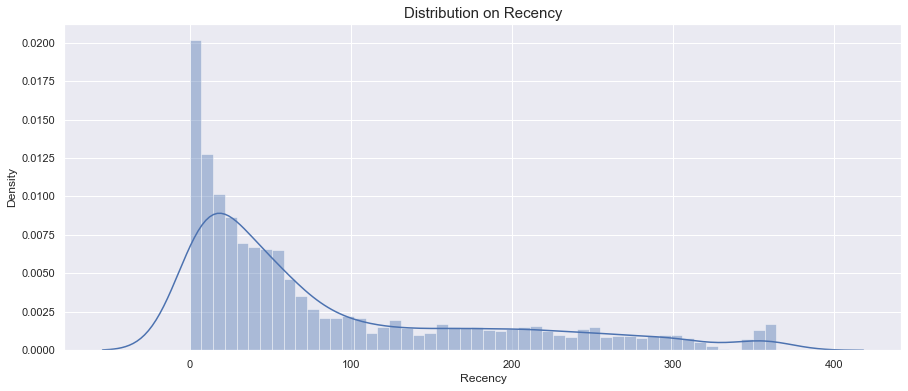

In [101]:
make_displot(df1_recency['Recency'], 'Recency')

### Frequency

In [94]:
df1_freq = df1.groupby('Customer ID')['InvoiceDate'].count().reset_index().rename(columns={'InvoiceDate':'Frequency'})
df1_freq.head()

,Customer ID,Frequency
0,12346.0,33
1,12347.0,39
2,12348.0,20
3,12349.0,80
4,12351.0,20


In [95]:
df1_rf = pd.merge(left=df1_recency,
                  right=df1_freq,
                  on='Customer ID')
df1_rf.head()

,Customer ID,Recency,Frequency
0,13085,305,61
1,13078,0,347
2,15362,74,31
3,12682,11,400
4,18087,5,50


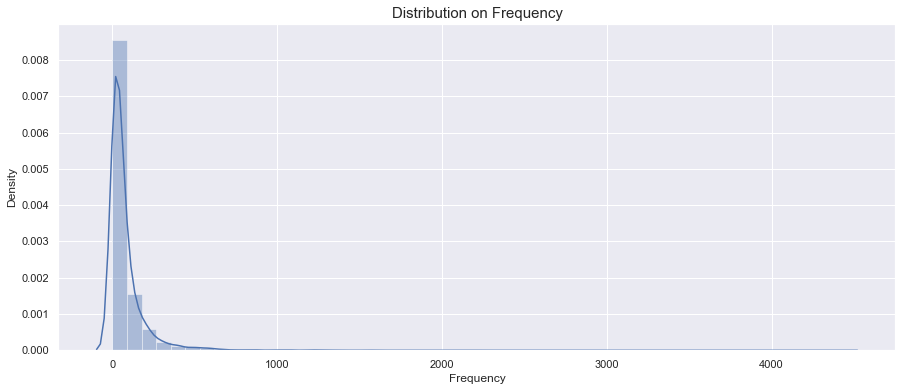

In [102]:
make_displot(df1_rf['Frequency'], 'Frequency')

### Monetary

In [106]:
df1_monetary = df1.groupby('Customer ID')['Spend'].sum().reset_index().rename(columns={'Spend':'Monetary'})
df1_monetary.head()

,Customer ID,Monetary
0,12346.0,372.86
1,12347.0,573.28
2,12348.0,222.16
3,12349.0,1635.89
4,12351.0,288.18


In [107]:
df1_rfm = pd.merge(left=df1_rf,
                   right=df1_monetary,
                   on='Customer ID')
df1_rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,13085,305,61,1916.40
1,13078,0,347,11466.64
2,15362,74,31,444.81
3,12682,11,400,7977.27
4,18087,5,50,1675.26


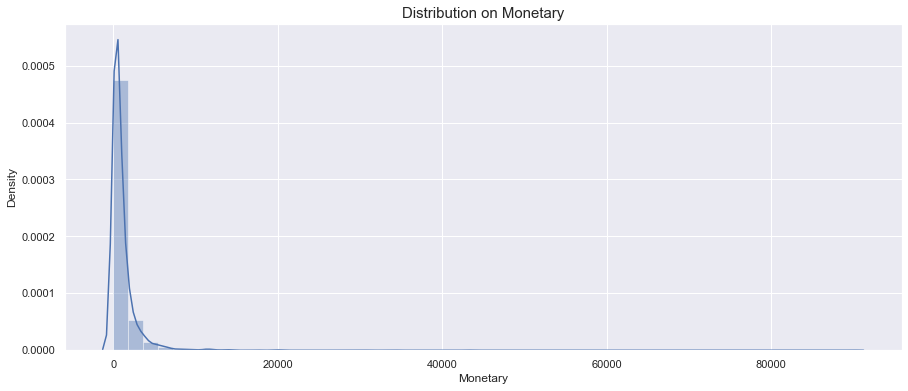

In [108]:
make_displot(df1_rfm['Monetary'], 'Monetary')

## Building Model RFM

### Calculate Weight RFM

In [109]:
df1_rfm.describe()

,Customer ID,Recency,Frequency,Monetary
count,4096.000000,4096.000000,4096.000000,4096.000000
mean,15360.140137,87.174805,80.600342,1056.892762
std,1694.213775,95.081551,169.459371,2314.858825
min,12346.000000,0.000000,1.000000,0.950000
25%,13897.750000,15.000000,16.000000,219.952500
50%,15365.500000,47.000000,38.000000,489.550000
75%,16840.250000,135.000000,87.000000,1183.540000
max,18287.000000,364.000000,4425.000000,89915.720000


## Customer Segmentation on Data Des 2010 - Nov 2011